In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline


from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re 
from gensim.models import Word2Vec
from tqdm import tqdm

In [3]:
dataset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')

In [4]:
dataset.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [5]:
testset.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [6]:
dataset.drop(columns=['id'],inplace=True)
testset.drop(columns=['id'],inplace=True)

In [7]:
testset.head()

comment_text
0  Yo bitch Ja Rule is more succesful then you'll...
1  == From RfC == \n\n The title is fine as it is...
2  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  :If you have a look back at the source, the in...
4          I don't anonymously edit articles at all.

In [8]:
dataset.head()

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  
0                 0     0       0      0       0  
1                 0     0       0      0       0  
2                 0     0       0      0       0  
3                 0     0       0      0       0  
4                 0     0       0      0       0

In [9]:
dataset.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [10]:
testset.isnull().sum()

comment_text    0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [12]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  153164 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


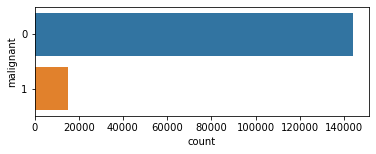

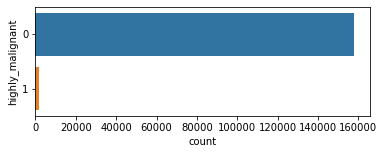

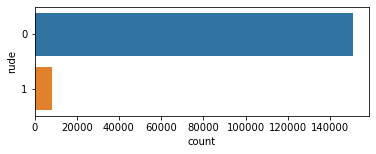

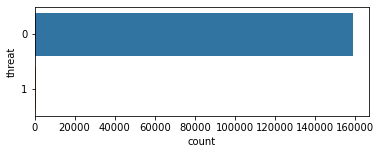

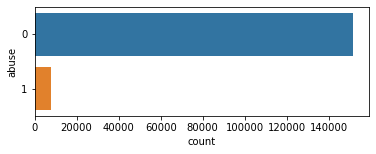

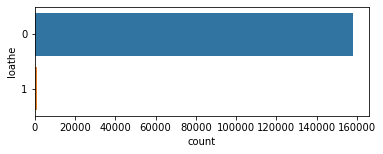

In [13]:
x=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in x:
    plt.figure(figsize = (6,2))
    sns.countplot(y=i ,data=dataset)

In [14]:
len(dataset.comment_text)

159571

In [15]:
dataset['length_of_comment']=dataset.comment_text.str.len()
dataset.head(6)

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   
5  "\n\nCongratulations from me as well, use the ...          0   

   highly_malignant  rude  threat  abuse  loathe  length_of_comment  
0                 0     0       0      0       0                264  
1                 0     0       0      0       0                112  
2                 0     0       0      0       0                233  
3                 0     0       0      0       0                622  
4                 0     0       0      0       0                 67  
5                 0     0       0      0       0                 65

In [16]:
newset=dataset

In [17]:
newset.head()

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  length_of_comment  
0                 0     0       0      0       0                264  
1                 0     0       0      0       0                112  
2                 0     0       0      0       0                233  
3                 0     0       0      0       0                622  
4                 0     0       0      0       0                 67

In [18]:
def decontracted(phrase):
    phrase = re.sub(r"’","'",phrase)
    phrase = re.sub(r"”",'"',phrase)
    phrase = re.sub(r"“",'"',phrase)
    phrase = re.sub(r"n\'t"," not",phrase)
    phrase = re.sub(r"\'re"," are",phrase)
    phrase = re.sub(r"\'s","s",phrase)
    phrase = re.sub(r"\'d"," would",phrase)
    phrase = re.sub(r"\'ll"," will",phrase)
    phrase = re.sub(r"\'t"," not",phrase)
    phrase = re.sub(r"\'ve"," have",phrase)
    phrase = re.sub(r"\'m"," am",phrase)
    return phrase 

In [19]:
cleaned_comment=[]
lemma= WordNetLemmatizer()
punch=string.punctuation
stop_words=stopwords.words('english')

for i in tqdm(range(0,len(newset.comment_text))):
    x=newset.comment_text[i]
    x=x.lower()
    sent=decontracted(x)
    sent=re.sub('[^a-z]+',' ',sent)
    y=[]
    for word in nltk.word_tokenize(sent):
        if word not in punch:
            if word not in stop_words:
                word=lemma.lemmatize(word,pos='v')
                y.append(word)
    cleaned_comment.append(" ".join(y))

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [01:09<00:00, 2293.36it/s]


In [20]:
df2=pd.DataFrame(list(zip(cleaned_comment)))
newset['cleaned_comment']=df2

In [21]:
newset.head()

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  length_of_comment  \
0                 0     0       0      0       0                264   
1                 0     0       0      0       0                112   
2                 0     0       0      0       0                233   
3                 0     0       0      0       0                622   
4                 0     0       0      0       0                 67   

                                     cleaned_comment  
0  explanation edit make username hardcore metall...  
1  aww match background colour seemingly stick th...  
2  hey man really try edit war guy constantly rem...  
3  ca make real suggestions improvement wonder se...  
4                sir hero chance remember page thats

In [22]:
cleaned_test_comment=[]
lemma= WordNetLemmatizer()
punch=string.punctuation
stop_words=stopwords.words('english')

for i in tqdm(range(0,len(testset.comment_text))):
    x=testset.comment_text[i]
    x=x.lower()
    sent=decontracted(x)
    sent=re.sub('[^a-z]+',' ',sent)
    y=[]
    for word in nltk.word_tokenize(sent):
        if word not in punch:
            if word not in stop_words:
                word=lemma.lemmatize(word,pos='v')
                y.append(word)
    cleaned_test_comment.append(" ".join(y))

100%|████████████████████████████████████████████████████████████████████████| 153164/153164 [01:00<00:00, 2535.87it/s]


In [23]:
test_comments_set=pd.DataFrame(list(zip(cleaned_test_comment)))
test_comments_set.head()

0
0  yo bitch ja rule succesful ever whats hat sad ...
1                                 rfc title fine imo
2                         source zawe ashton lapland
3  look back source information update correct fo...
4                           anonymously edit article

In [24]:
newset['cleaned_comment_length']=dataset.cleaned_comment.str.len()
newset.head(6)

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   
5  "\n\nCongratulations from me as well, use the ...          0   

   highly_malignant  rude  threat  abuse  loathe  length_of_comment  \
0                 0     0       0      0       0                264   
1                 0     0       0      0       0                112   
2                 0     0       0      0       0                233   
3                 0     0       0      0       0                622   
4                 0     0       0      0       0                 67   
5                 0     0       0      0       0                 65   

                                     cleaned_comment  cleaned_comment_length  
0  explanation edit make username hardcore metall...                     153  
1  aww match background colour seemingly stick th...                      66  
2  hey man really try edit war guy constantly rem...                     127  
3  ca make real suggestions improvement wonder se...                     360  
4                sir hero chance remember page thats                      35  
5            congratulations well use tool well talk                      39

In [25]:
print('Average Comment Length : ',newset.length_of_comment.mean())

Average Comment Length :  394.138847284281


In [26]:
print('Average Cleaned Comment Length : ',newset.cleaned_comment_length.mean())

Average Cleaned Comment Length :  237.8845905584348


In [27]:
newset.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  length_of_comment  cleaned_comment_length  
count  159571.000000  159571.000000      159571.000000           159571.000000  
mean        0.049364       0.008805         394.138847              237.884591  
std         0.216627       0.093420         590.725381              373.603136  
min         0.000000       0.000000           5.000000                0.000000  
25%         0.000000       0.000000          96.000000               55.000000  
50%         0.000000       0.000000         205.000000              121.000000  
75%         0.000000       0.000000         436.000000              259.000000  
max         1.000000       1.000000        5000.000000             5000.000000

In [28]:
newset.loc[newset['length_of_comment'].between(0,100), 'comment_word_range'] = 100
newset.loc[newset['length_of_comment'].between(101,200), 'comment_word_range'] = 200
newset.loc[newset['length_of_comment'].between(201,400), 'comment_word_range'] = 400
newset.loc[newset['length_of_comment'].between(401,600), 'comment_word_range'] = 600
newset.loc[newset['length_of_comment'].between(601,800), 'comment_word_range'] = 600
newset.loc[newset['length_of_comment'].between(801,1000), 'comment_word_range'] = 600
newset.loc[newset['length_of_comment'].between(1001,5000), 'comment_word_range'] = 1200

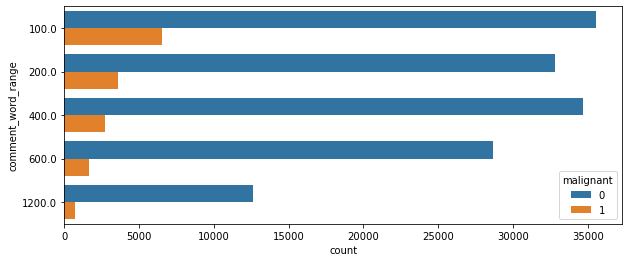

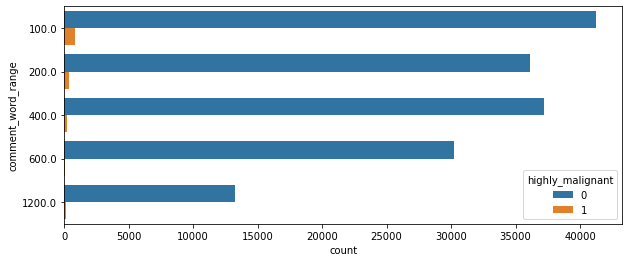

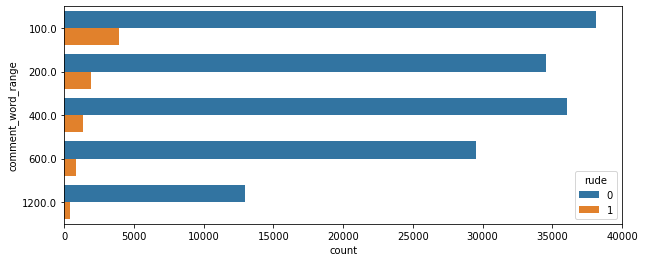

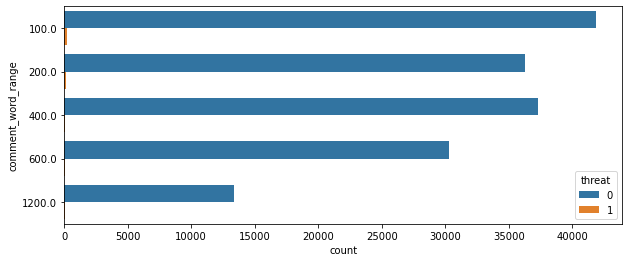

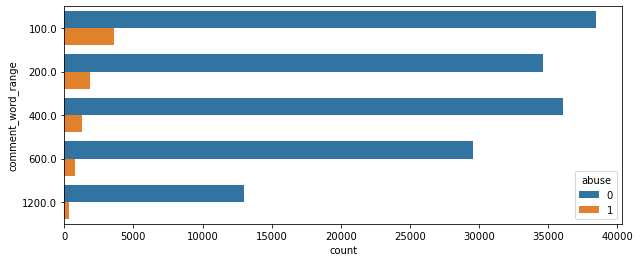

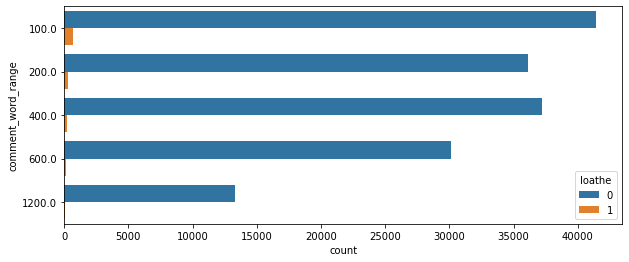

In [29]:
e=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in e:
    plt.figure(figsize=(10,4))
    sns.countplot(y='comment_word_range', hue= i, data=newset)
    plt.show()

<AxesSubplot:xlabel='length_of_comment', ylabel='Count'>

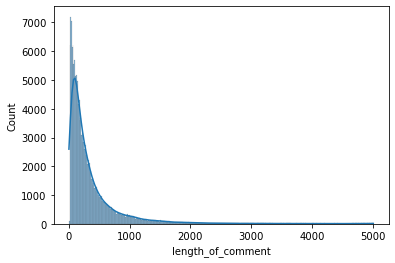

In [30]:
sns.histplot(data = newset['length_of_comment'], kde = True)

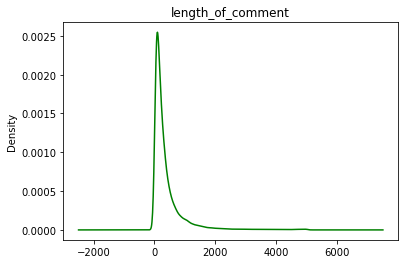

In [31]:
newset.length_of_comment.plot.density(color='green')
plt.title('length_of_comment')
plt.show()

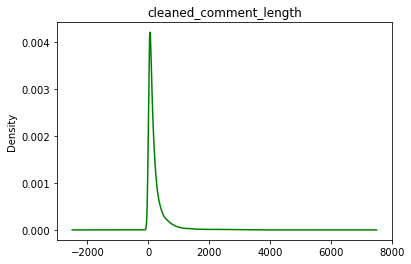

In [32]:
newset.cleaned_comment_length.plot.density(color='green')
plt.title('cleaned_comment_length')
plt.show()

In [33]:
newset.cleaned_comment_length.nunique()

2957

In [34]:
heatset=pd.read_csv('train.csv')
heatset.drop(columns=['id','comment_text'],inplace=True)

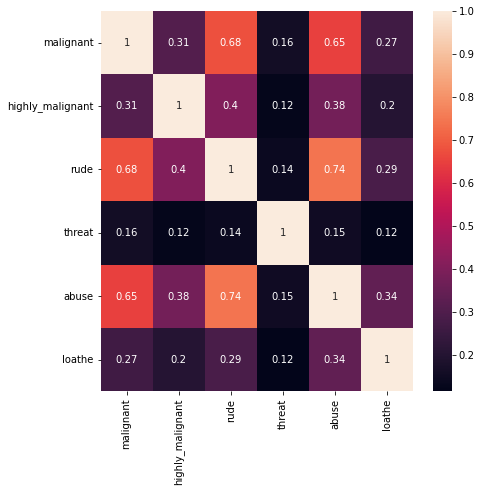

In [35]:
plt.figure(figsize=(7,7))
sns.heatmap(heatset.corr(), annot=True)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████| 159571/159571 [15:02<00:00, 176.72it/s]


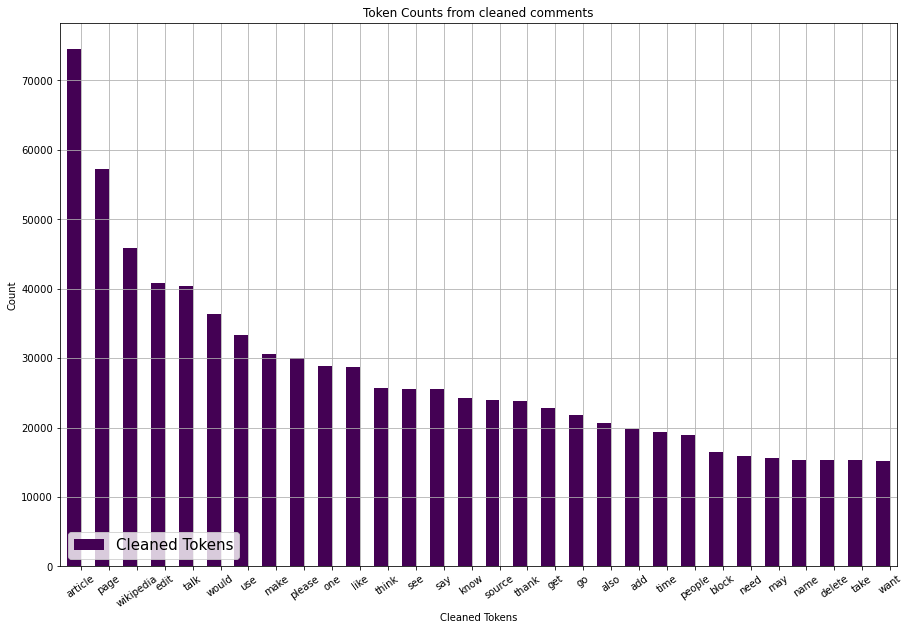

In [40]:
all_comment_words=""
for i in tqdm(range(0,len(newset.cleaned_comment))):
    y=newset.cleaned_comment[i]
    all_comment_words=all_comment_words+" "+y
    
cleaned_tokens = word_tokenize(all_comment_words)
cleaned_tokenized_counts = Counter(cleaned_tokens)
df__cleaned_tokenized = pd.DataFrame.from_dict(cleaned_tokenized_counts, orient="index").reset_index()

df__cleaned_tokenized.sort_values(by=0, ascending=False, inplace=True)
df__cleaned_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel="Cleaned Tokens", ylabel="Count", colormap="viridis", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from cleaned comments", legend=True).legend(["Cleaned Tokens"], loc="lower left", prop={"size":15})

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [1:58:14<00:00, 22.49it/s]


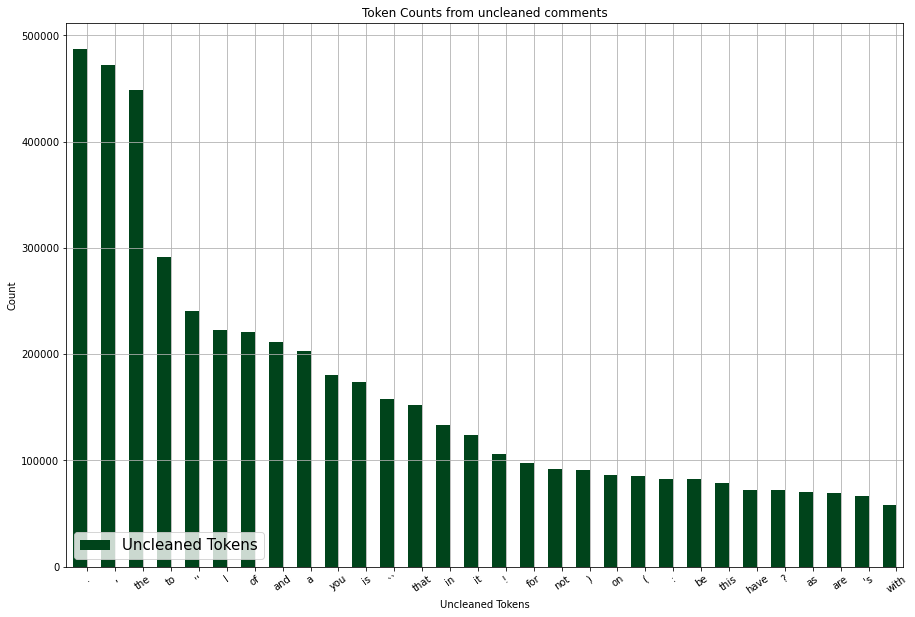

In [41]:
all_comment_words_uncleaned=""
for i in tqdm(range(0,len(newset.comment_text))):
    y=newset.comment_text[i]
    all_comment_words_uncleaned=all_comment_words_uncleaned+" "+y

uncleaned_tokens = word_tokenize(all_comment_words_uncleaned)
uncleaned_tokenized_counts = Counter(uncleaned_tokens)
df__uncleaned_tokenized = pd.DataFrame.from_dict(uncleaned_tokenized_counts, orient="index").reset_index()

df__uncleaned_tokenized.sort_values(by=0, ascending=False, inplace=True)
df__uncleaned_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel="Uncleaned Tokens", ylabel="Count", colormap="Greens_r", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from uncleaned comments", legend=True).legend(["Uncleaned Tokens"], loc="lower left", prop={"size":15})

In [36]:
def top_words(col):
    phrase=newset['cleaned_comment'][newset[col]==1]
    phrase_df=pd.DataFrame(phrase)
    phrase_df = phrase_df.reset_index()
    all_words_cleaned=""
    for i in tqdm(range(0,len(phrase_df.cleaned_comment))):
        y=phrase_df.cleaned_comment[i]
        all_words_cleaned=all_words_cleaned+" "+y

    tokens = word_tokenize(all_words_cleaned)
    tokenized_counts = Counter(tokens)
    df_tokenized = pd.DataFrame.from_dict(tokenized_counts, orient="index").reset_index()
    df_tokenized.sort_values(by=0, ascending=False, inplace=True)
    df_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel=str(col)+" Tokens", ylabel="Count", colormap="viridis", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from "+str(col)+" comments", legend=True).legend([str(col)+" Tokens"], loc="lower left", prop={"size":15})

100%|███████████████████████████████████████████████████████████████████████████| 1405/1405 [00:00<00:00, 66994.81it/s]


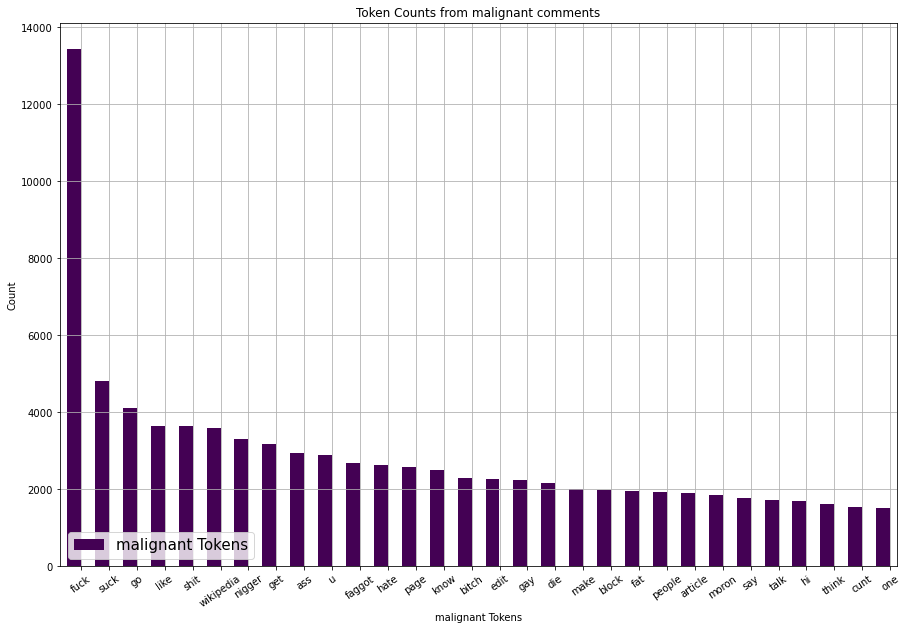

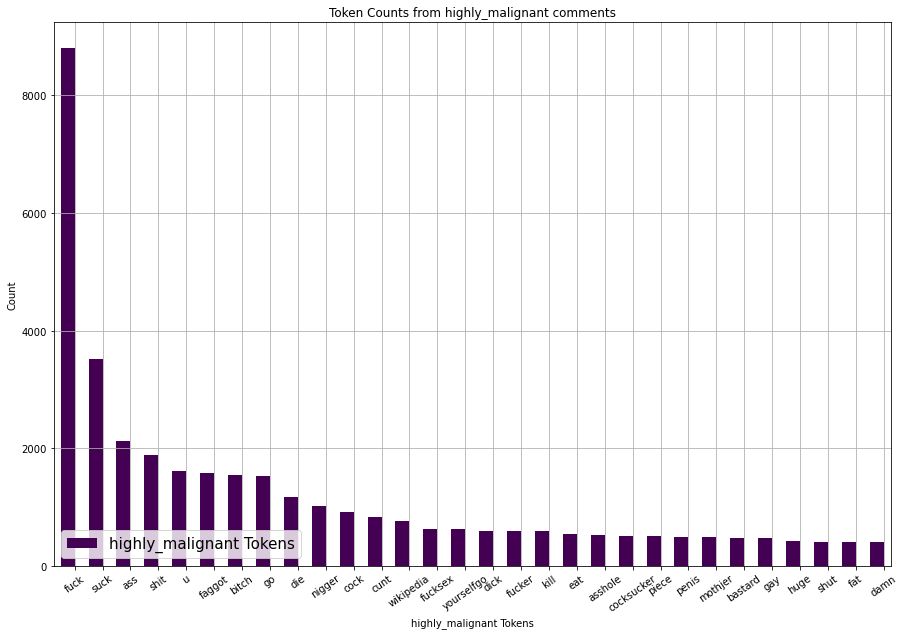

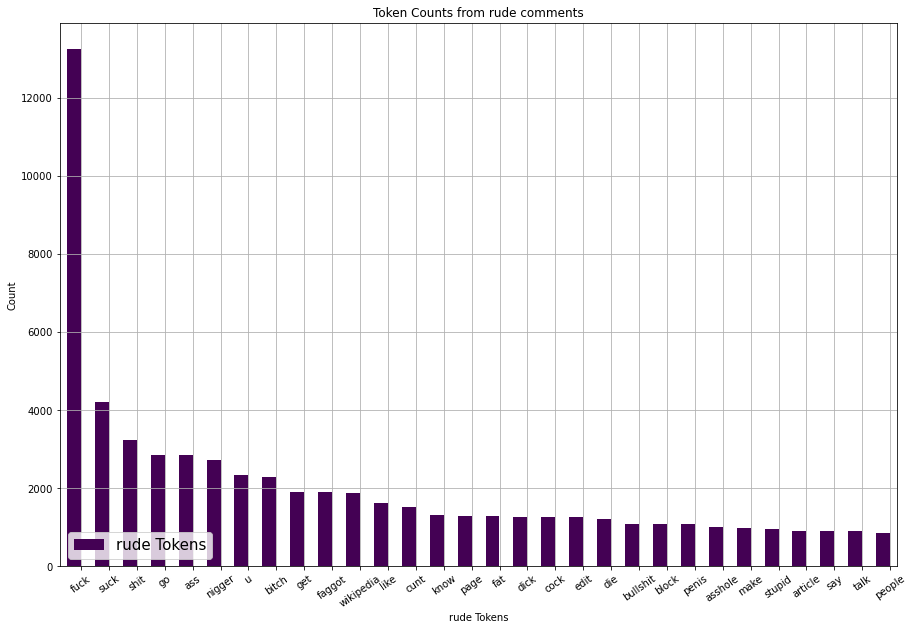

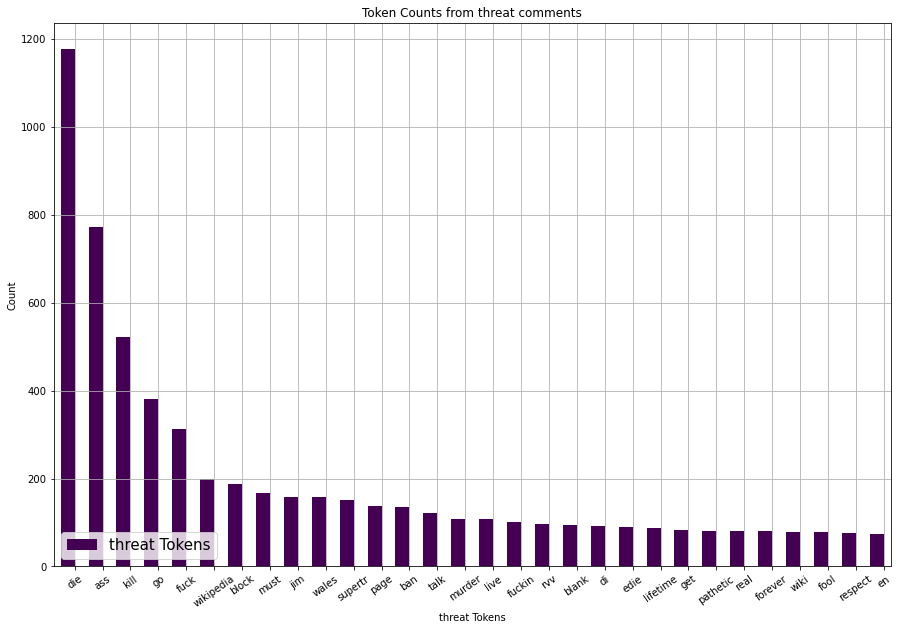

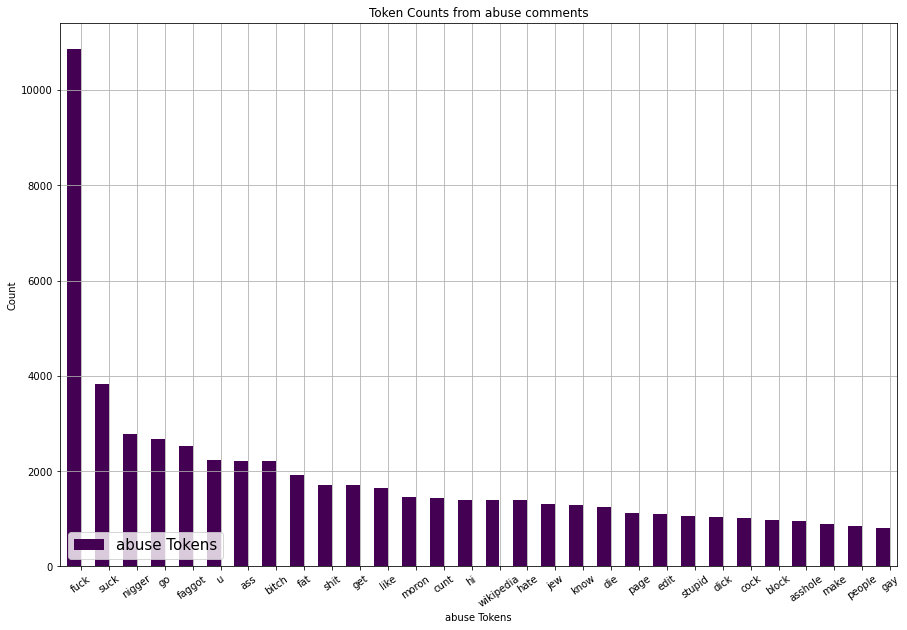

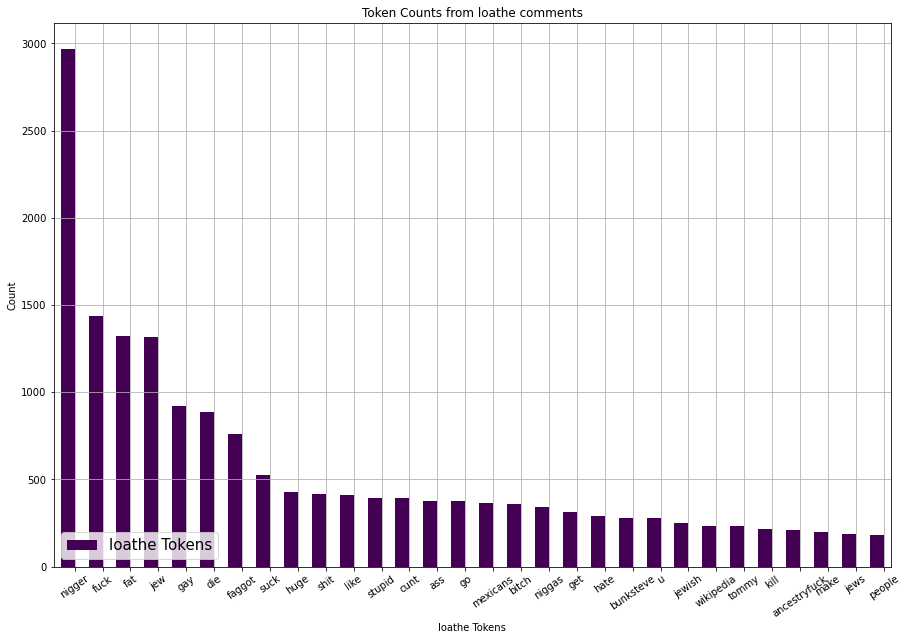

In [37]:
cols=['malignant','highly_malignant','rude','threat','abuse','loathe']
for col in cols:
    top_words(col)

In [38]:
newset.head()

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  length_of_comment  \
0                 0     0       0      0       0                264   
1                 0     0       0      0       0                112   
2                 0     0       0      0       0                233   
3                 0     0       0      0       0                622   
4                 0     0       0      0       0                 67   

                                     cleaned_comment  cleaned_comment_length  \
0  explanation edit make username hardcore metall...                     153   
1  aww match background colour seemingly stick th...                      66   
2  hey man really try edit war guy constantly rem...                     127   
3  ca make real suggestions improvement wonder se...                     360   
4                sir hero chance remember page thats                      35   

   comment_word_range  
0               400.0  
1               200.0  
2               400.0  
3               600.0  
4               100.0

In [39]:
newset.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  length_of_comment  \
count  159571.000000  159571.000000      159571.000000   
mean        0.049364       0.008805         394.138847   
std         0.216627       0.093420         590.725381   
min         0.000000       0.000000           5.000000   
25%         0.000000       0.000000          96.000000   
50%         0.000000       0.000000         205.000000   
75%         0.000000       0.000000         436.000000   
max         1.000000       1.000000        5000.000000   

       cleaned_comment_length  comment_word_range  
count           159571.000000       159571.000000  
mean               237.884591          380.268971  
std                373.603136          306.023042  
min                  0.000000          100.000000  
25%                 55.000000          100.000000  
50%                121.000000          400.000000  
75%                259.000000          600.000000  
max               5000.000000         1200.000000

Observations:
1.	Malignant, highly malignant, rude, threat, abuse, loathe labelled as are very minor as majority of the data is non-malignant.
2.	Malignant has maximum compared to all the other labels.
3.	Comments constructed with less than 100 words have more malignant, highly malignant, rude, threat, abuse and loath comments and words with above 1200 has minimum set of it.
4.	Malignant, rude and abuse comments are highly co-relative to each other.
5.	In uncleaned comments most used words are punctuations and stop words.
6.	In cleaned comments most used words is ‘article’, followed by page, Wikipedia, edit and talk.
7.	Most comment have a word count of below 100 and minimum comments have a word count of above 1200.
8.	Top words for malignant comments are ‘fuck’, ‘suck’, ‘go’, ‘shit’.
9.	Top words for highly malignant, abuse and rude comments are same as malignant.
10.	The top word for threat comment is ‘kill’ followed by ‘die’.
11.	The top word for loathe comment is ‘nigger’.
12.	Average comment length for uncleaned comment is 394 words.	 
13.	Average comment length for cleaned comment is 238 words.


# Model Training

In [40]:
X=newset['cleaned_comment']
y=newset['malignant']
X.head()

0    explanation edit make username hardcore metall...
1    aww match background colour seemingly stick th...
2    hey man really try edit war guy constantly rem...
3    ca make real suggestions improvement wonder se...
4                  sir hero chance remember page thats
Name: cleaned_comment, dtype: object

In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: malignant, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,stratify=y)

In [43]:
y_train.value_counts()

0    115421
1     12235
Name: malignant, dtype: int64

In [44]:
y_test.value_counts()

0    28856
1     3059
Name: malignant, dtype: int64

In [45]:
text_clf_1= Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [46]:
text_clf_1.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [47]:
p1=text_clf_1.predict(X_test)

In [48]:
print(classification_report(p1, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     29539
           1       0.67      0.86      0.76      2376

    accuracy                           0.96     31915
   macro avg       0.83      0.92      0.87     31915
weighted avg       0.97      0.96      0.96     31915



In [49]:
text_clf_2= Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression())])
text_clf_2.fit(X_train,y_train)
p2=text_clf_2.predict(X_test)
print(classification_report(p2, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     29905
           1       0.60      0.91      0.72      2010

    accuracy                           0.96     31915
   macro avg       0.80      0.93      0.85     31915
weighted avg       0.97      0.96      0.96     31915



In [50]:
text_clf_3= Pipeline([('tfidf',TfidfVectorizer()),('log',XGBClassifier())])
text_clf_3.fit(X_train,y_train)
p3=text_clf_3.predict(X_test)
print(classification_report(p3, y_test))

[14:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     29960
           1       0.57      0.90      0.70      1955

    accuracy                           0.95     31915
   macro avg       0.78      0.93      0.84     31915
weighted avg       0.97      0.95      0.96     31915



In [51]:
text_clf_4= Pipeline([('tfidf',TfidfVectorizer()),('log',KNeighborsClassifier())])
text_clf_4.fit(X_train,y_train)
p4=text_clf_4.predict(X_test)
print(classification_report(p4, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     31263
           1       0.18      0.86      0.30       652

    accuracy                           0.92     31915
   macro avg       0.59      0.89      0.63     31915
weighted avg       0.98      0.92      0.94     31915



In [52]:
text_clf_5= Pipeline([('tfidf',TfidfVectorizer()),('log',RandomForestClassifier())])
text_clf_5.fit(X_train,y_train)
p5=text_clf_5.predict(X_test)
print(classification_report(p5, y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     30118
           1       0.54      0.91      0.68      1797

    accuracy                           0.95     31915
   macro avg       0.77      0.93      0.83     31915
weighted avg       0.97      0.95      0.96     31915



# Hyperparameter Tuning

In [53]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [54]:
tfidf=TfidfVectorizer()
clf1=LogisticRegression()
pipe1=make_pipeline(tfidf,clf1)

In [55]:
params={}
params['logisticregression__C']=[100, 10, 1.0, 0.1, 0.01]
params['logisticregression__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
params['logisticregression__penalty'] = ['l2','l1']

In [56]:
params

{'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'logisticregression__penalty': ['l2', 'l1']}

In [57]:
grid1=gs(pipe1,params,cv=cv,scoring='accuracy',verbose=10)
grid1.fit(X_train,y_train)

Fitting 30 folds for each of 30 candidates, totalling 900 fits
[CV 1/30; 1/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 1/30; 1/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.956 total time=   8.2s
[CV 2/30; 1/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 2/30; 1/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.952 total time=   7.8s
[CV 3/30; 1/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 3/30; 1/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.958 total time=   7.8s
[CV 4/30; 1/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 4/30; 1/30] EN

[CV 1/30; 2/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.958 total time=   5.8s
[CV 2/30; 2/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 2/30; 2/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.952 total time=   5.8s
[CV 3/30; 2/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 3/30; 2/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.959 total time=   5.8s
[CV 4/30; 2/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 4/30; 2/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.955 total time=   5.8s
[CV 5/30; 2/30] START logisticregression__C=100, logisticregression__penalty=l

[CV 3/30; 3/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.958 total time=   4.7s
[CV 4/30; 3/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 4/30; 3/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.955 total time=   4.9s
[CV 5/30; 3/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 5/30; 3/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.955 total time=   4.8s
[CV 6/30; 3/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 6/30; 3/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.956 total time=   5.2s
[CV 7/30; 3/30] START logisticregression__C=100, l

[CV 4/30; 4/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 5/30; 4/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 5/30; 4/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 6/30; 4/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 6/30; 4/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 7/30; 4/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 7/30; 4/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 8/30; 4/30] START logisticregression__C=100, logisticr

[CV 5/30; 5/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 6/30; 5/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 6/30; 5/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 7/30; 5/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 7/30; 5/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 8/30; 5/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 8/30; 5/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 9/30; 5/30] START logisticregression__C=100, logisticregression__penalty=l1, logis

[CV 7/30; 6/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.946 total time=   7.2s
[CV 8/30; 6/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 8/30; 6/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.950 total time=   7.3s
[CV 9/30; 6/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 9/30; 6/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.947 total time=   7.4s
[CV 10/30; 6/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 10/30; 6/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.946 total time=   7.4s
[CV 11/30; 6/30] START logisticregression__C=100

[CV 8/30; 7/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.960 total time=   6.1s
[CV 9/30; 7/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 9/30; 7/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.959 total time=   6.1s
[CV 10/30; 7/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 10/30; 7/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.958 total time=   6.1s
[CV 11/30; 7/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 11/30; 7/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.960 total time=   6.5s
[CV 12/30; 7/30] START logisticregression__C=10, logi

[CV 10/30; 8/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.958 total time=   5.7s
[CV 11/30; 8/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 11/30; 8/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.960 total time=   5.8s
[CV 12/30; 8/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 12/30; 8/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.957 total time=   5.8s
[CV 13/30; 8/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 13/30; 8/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.958 total time=   5.8s
[CV 14/30; 8/30] START logisticregression__C=10, logisticregression__penalty=l

[CV 12/30; 9/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.957 total time=   3.9s
[CV 13/30; 9/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 13/30; 9/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.958 total time=   3.9s
[CV 14/30; 9/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 14/30; 9/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.959 total time=   3.8s
[CV 15/30; 9/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 15/30; 9/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.960 total time=   3.8s
[CV 16/30; 9/30] START logisticregression__C=10, l

[CV 13/30; 10/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 14/30; 10/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 14/30; 10/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 15/30; 10/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 15/30; 10/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 16/30; 10/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 16/30; 10/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 17/30; 10/30] START logisticregression__C=10, l

[CV 15/30; 11/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 16/30; 11/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 16/30; 11/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 17/30; 11/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 17/30; 11/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 18/30; 11/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 18/30; 11/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 19/30; 11/30] START logisticregression__C=10, logisticregression__penalty=l

[CV 17/30; 12/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.959 total time=   4.5s
[CV 18/30; 12/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 18/30; 12/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.956 total time=   4.5s
[CV 19/30; 12/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 19/30; 12/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.959 total time=   4.5s
[CV 20/30; 12/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 20/30; 12/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.958 total time=   4.7s
[CV 21/30; 12/30] START logisticregression_

[CV 18/30; 13/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.955 total time=   5.1s
[CV 19/30; 13/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 19/30; 13/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.959 total time=   5.0s
[CV 20/30; 13/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 20/30; 13/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.958 total time=   5.0s
[CV 21/30; 13/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 21/30; 13/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.957 total time=   5.1s
[CV 22/30; 13/30] START logisticregr

[CV 19/30; 14/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.959 total time=   5.7s
[CV 20/30; 14/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 20/30; 14/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.958 total time=   5.7s
[CV 21/30; 14/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 21/30; 14/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.957 total time=   5.8s
[CV 22/30; 14/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 22/30; 14/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.959 total time=   5.8s
[CV 23/30; 14/30] START logisticregression__C=1.0, logisticregre

[CV 20/30; 15/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.958 total time=   3.4s
[CV 21/30; 15/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 21/30; 15/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.957 total time=   3.4s
[CV 22/30; 15/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 22/30; 15/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.959 total time=   3.4s
[CV 23/30; 15/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 23/30; 15/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.955 total time=   3.4s
[CV 24/30; 15/30] START logisticregr

[CV 21/30; 16/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 22/30; 16/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 22/30; 16/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 23/30; 16/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 23/30; 16/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 24/30; 16/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 24/30; 16/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 25/30; 16/30] START logisticregression__

[CV 23/30; 17/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 24/30; 17/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 24/30; 17/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 25/30; 17/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 25/30; 17/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 26/30; 17/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 26/30; 17/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 27/30; 17/30] START logisticregression__C=1.0, logisticregression__p

[CV 24/30; 18/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.959 total time=   3.3s
[CV 25/30; 18/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 25/30; 18/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.961 total time=   3.4s
[CV 26/30; 18/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 26/30; 18/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.958 total time=   3.4s
[CV 27/30; 18/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 27/30; 18/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.962 total time=   3.3s
[CV 28/30; 18/30] START logisticregr

[CV 25/30; 19/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.938 total time=   4.2s
[CV 26/30; 19/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 26/30; 19/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.937 total time=   4.2s
[CV 27/30; 19/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 27/30; 19/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.938 total time=   4.2s
[CV 28/30; 19/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 28/30; 19/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.937 total time=   4.2s
[CV 29/30; 19/30] START logisticregr

[CV 27/30; 20/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.938 total time=   4.3s
[CV 28/30; 20/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 28/30; 20/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.937 total time=   4.3s
[CV 29/30; 20/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 29/30; 20/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.936 total time=   3.9s
[CV 30/30; 20/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 30/30; 20/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.938 total time=   4.3s
[CV 1/30; 21/30] START logisticregression__C=0.1, logisticregres

[CV 28/30; 21/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.937 total time=   3.1s
[CV 29/30; 21/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 29/30; 21/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.936 total time=   3.1s
[CV 30/30; 21/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 30/30; 21/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.938 total time=   3.1s
[CV 1/30; 22/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 1/30; 22/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 2/30; 22/30] START logisticregressio

[CV 29/30; 22/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 30/30; 22/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 30/30; 22/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 1/30; 23/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 1/30; 23/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 2/30; 23/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 2/30; 23/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 3/30; 23/30] START logisticregression__C=0.1, logisticregres

[CV 1/30; 24/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.950 total time=   3.1s
[CV 2/30; 24/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 2/30; 24/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.948 total time=   3.2s
[CV 3/30; 24/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 3/30; 24/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.950 total time=   3.1s
[CV 4/30; 24/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 4/30; 24/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.949 total time=   3.1s
[CV 5/30; 24/30] START logisticregression__

[CV 2/30; 25/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.910 total time=   4.0s
[CV 3/30; 25/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 3/30; 25/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.911 total time=   3.9s
[CV 4/30; 25/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 4/30; 25/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.910 total time=   4.0s
[CV 5/30; 25/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 5/30; 25/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.911 total time=   3.9s
[CV 6/30; 25/30] START logisticregre

[CV 3/30; 26/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.911 total time=   3.4s
[CV 4/30; 26/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 4/30; 26/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.910 total time=   3.4s
[CV 5/30; 26/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 5/30; 26/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.911 total time=   3.4s
[CV 6/30; 26/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 6/30; 26/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.910 total time=   3.4s
[CV 7/30; 26/30] START logisticregression__C=0.01, logisticregre

[CV 4/30; 27/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.910 total time=   3.0s
[CV 5/30; 27/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 5/30; 27/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.911 total time=   3.0s
[CV 6/30; 27/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 6/30; 27/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.910 total time=   3.0s
[CV 7/30; 27/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 7/30; 27/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.910 total time=   3.0s
[CV 8/30; 27/30] START logisticregre

[CV 5/30; 28/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 6/30; 28/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 6/30; 28/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 7/30; 28/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 7/30; 28/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 8/30; 28/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 8/30; 28/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 9/30; 28/30] START logisticregression__C

[CV 6/30; 29/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 7/30; 29/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 7/30; 29/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 8/30; 29/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 8/30; 29/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 9/30; 29/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 9/30; 29/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 10/30; 29/30] START logisticregression__C=0.01, logisticregression__

[CV 7/30; 30/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.924 total time=   2.9s
[CV 8/30; 30/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 8/30; 30/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.924 total time=   3.0s
[CV 9/30; 30/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 9/30; 30/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.925 total time=   3.0s
[CV 10/30; 30/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 10/30; 30/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.924 total time=   3.0s
[CV 11/30; 30/30] START logisticre

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
                         'logisticregression__penalty': ['l2', 'l1'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear']},
             scoring='accuracy', verbose=10)

In [58]:
grid1.best_estimator_

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [59]:
text_clf_6= Pipeline([('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(C=10, solver='liblinear'))])
text_clf_6.fit(X_train,y_train)
p6=text_clf_6.predict(X_test)
print(classification_report(p6, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     29555
           1       0.67      0.87      0.75      2360

    accuracy                           0.96     31915
   macro avg       0.83      0.92      0.87     31915
weighted avg       0.97      0.96      0.96     31915



In [60]:
clf2=LinearSVC()
pipe2=make_pipeline(tfidf,clf2)
parameters={}
parameters['tfidfvectorizer__min_df']= [1,2,3,4,5]
parameters['tfidfvectorizer__max_df']= [0.25, 0.5, 0.75],
parameters['tfidfvectorizer__ngram_range']= [(1, 1), (1, 2), (1, 3)]
parameters['linearsvc__C']=[100, 10, 1.0, 0.1, 0.01]
parameters['linearsvc__penalty'] = ['l2','l1']
parameters['linearsvc__multi_class']=['ovr', 'crammer_singer']

In [61]:
parameters

{'tfidfvectorizer__min_df': [1, 2, 3, 4, 5],
 'tfidfvectorizer__max_df': ([0.25, 0.5, 0.75],),
 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
 'linearsvc__C': [100, 10, 1.0, 0.1, 0.01],
 'linearsvc__penalty': ['l2', 'l1'],
 'linearsvc__multi_class': ['ovr', 'crammer_singer']}

In [62]:
grid2=gs(pipe2,parameters,cv=cv,scoring='accuracy',verbose=10)
grid2.fit(X_train,y_train)

Fitting 30 folds for each of 300 candidates, totalling 9000 fits
[CV 1/30; 1/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 1/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 2/30; 1/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 1/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 3/30; 1/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penal

[CV 1/30; 2/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 2/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 2/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 2/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 2/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 23/30; 2/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 2/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 2/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 2/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 2/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 15/30; 3/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 16/30; 3/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 3/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 3/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 3/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 7/30; 4/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 8/30; 4/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 8/30; 4/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 9/30; 4/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 9/30; 4/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 29/30; 4/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 4/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 4/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 1/30; 5/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 1/30; 5/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorize

[CV 22/30; 5/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 5/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 5/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 5/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 5/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 16/30; 6/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 6/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 6/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 6/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 6/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 9/30; 7/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 7/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 7/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 7/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 7/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectoriz

[CV 1/30; 8/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 8/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 8/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 8/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 8/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 23/30; 8/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 8/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 8/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 8/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 8/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 16/30; 9/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 9/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 9/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 9/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 9/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 10/30; 10/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 10/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 10/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 12/30; 10/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 10/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 3/30; 11/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 11/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 11/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 5/30; 11/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 11/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 27/30; 11/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 28/30; 11/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 11/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 29/30; 11/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 11/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 20/30; 12/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 12/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 12/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 12/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 12/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 14/30; 13/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 13/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 13/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 13/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 13/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 6/30; 14/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 14/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 14/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 14/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 14/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvecto

[CV 29/30; 14/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 14/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 14/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 15/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 15/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvect

[CV 22/30; 15/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 15/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 15/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 15/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 15/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 16/30; 16/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 16/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 16/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 16/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 16/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 8/30; 17/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 17/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 17/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 17/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 17/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvecto

[CV 1/30; 18/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 18/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 18/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 18/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 18/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 23/30; 18/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 18/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 18/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 18/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 18/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 16/30; 19/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 19/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 19/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 19/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 19/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 10/30; 20/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 20/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 20/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 20/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 20/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 3/30; 21/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 21/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 21/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 5/30; 21/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 21/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 27/30; 21/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 21/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 21/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 21/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 21/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 21/30; 22/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 22/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 22/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 23/30; 22/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 22/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 14/30; 23/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 23/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 23/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 23/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 23/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 6/30; 24/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 7/30; 24/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 7/30; 24/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 8/30; 24/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 8/30; 24/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 28/30; 24/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 24/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 24/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 30/30; 24/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 30/30; 24/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 21/30; 25/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 25/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 25/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 23/30; 25/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 25/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 14/30; 26/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 26/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 26/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 26/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 26/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 8/30; 27/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 27/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 27/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 10/30; 27/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 10/30; 27/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvecto

[CV 30/30; 27/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 1/30; 28/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 28/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 2/30; 28/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 28/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvector

[CV 23/30; 28/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 24/30; 28/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 24/30; 28/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 25/30; 28/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 25/30; 28/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 15/30; 29/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 29/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 29/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 17/30; 29/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 17/30; 29/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 8/30; 30/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 30/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 30/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 10/30; 30/300] START linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 10/30; 30/300] END linearsvc__C=100, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvecto

[CV 2/30; 31/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 3/30; 31/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 3/30; 31/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 4/30; 31/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 4/30; 31/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 25/30; 31/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 26/30; 31/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 26/30; 31/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 27/30; 31/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 27/30; 31/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 19/30; 32/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 20/30; 32/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 20/30; 32/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 32/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 32/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 12/30; 33/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 33/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 33/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 33/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 33/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 6/30; 34/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 34/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 34/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 8/30; 34/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 8/30; 34/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 30/30; 34/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 1/30; 35/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 1/30; 35/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 35/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 35/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2,

[CV 23/30; 35/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 35/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 35/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 35/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 35/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 17/30; 36/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 36/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 36/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 19/30; 36/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 19/30; 36/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 9/30; 37/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 37/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 37/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 37/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 37/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=

[CV 2/30; 38/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 38/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 38/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 38/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 38/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 25/30; 38/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 26/30; 38/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 38/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 27/30; 38/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 27/30; 38/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 17/30; 39/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 39/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 39/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 19/30; 39/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 19/30; 39/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 10/30; 40/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 40/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 40/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 12/30; 40/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 40/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 2/30; 41/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 41/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 41/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 41/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 41/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 25/30; 41/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 26/30; 41/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 41/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 27/30; 41/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 27/30; 41/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 17/30; 42/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 42/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 42/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 19/30; 42/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 19/30; 42/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 10/30; 43/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 43/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 43/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 12/30; 43/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 43/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 3/30; 44/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 44/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 44/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 5/30; 44/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 44/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 27/30; 44/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 28/30; 44/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 44/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 29/30; 44/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 44/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 20/30; 45/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 45/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 45/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 45/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 45/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 13/30; 46/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 14/30; 46/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 14/30; 46/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 46/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 46/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 6/30; 47/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 47/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 47/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 47/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 47/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 30/30; 47/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 48/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 48/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 48/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 48/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1,

[CV 22/30; 48/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 48/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 48/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 48/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 48/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 15/30; 49/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 49/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 49/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 49/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 49/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 7/30; 50/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 50/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 50/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 50/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 50/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 29/30; 50/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 50/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 50/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 51/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 51/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l

[CV 21/30; 51/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 51/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 51/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 51/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 51/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 14/30; 52/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 52/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 52/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 52/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 52/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 6/30; 53/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 53/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 53/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 53/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 53/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 29/30; 53/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 53/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 53/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 54/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 54/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l

[CV 23/30; 54/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 54/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 54/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 54/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 54/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 16/30; 55/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 55/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 55/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 55/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 55/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 8/30; 56/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 56/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 56/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 56/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 56/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1

[CV 1/30; 57/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 57/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 57/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 57/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 57/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 24/30; 57/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 57/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 57/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 57/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 57/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 18/30; 58/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 19/30; 58/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 58/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 20/30; 58/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 58/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 11/30; 59/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 59/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 59/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 13/30; 59/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 59/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 5/30; 60/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 6/30; 60/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 6/30; 60/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 7/30; 60/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 7/30; 60/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 27/30; 60/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 60/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 60/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 60/300] START linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 60/300] END linearsvc__C=100, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 20/30; 61/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 21/30; 61/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 21/30; 61/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 61/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 61/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 14/30; 62/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 62/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 62/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 62/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 62/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 7/30; 63/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 8/30; 63/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 8/30; 63/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 63/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 63/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 30/30; 63/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 1/30; 64/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 64/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 2/30; 64/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 64/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer_

[CV 24/30; 64/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 25/30; 64/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 25/30; 64/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 26/30; 64/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 26/30; 64/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 17/30; 65/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 18/30; 65/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 18/30; 65/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 19/30; 65/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 19/30; 65/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 11/30; 66/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 12/30; 66/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 12/30; 66/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 66/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 66/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 4/30; 67/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 5/30; 67/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 5/30; 67/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 67/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 67/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 28/30; 67/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 67/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 67/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 67/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 67/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 21/30; 68/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 68/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 68/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 68/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 68/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 14/30; 69/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 15/30; 69/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 15/30; 69/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 16/30; 69/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 69/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 6/30; 70/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 70/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 70/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 8/30; 70/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 8/30; 70/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 29/30; 70/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 70/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 70/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 1/30; 71/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 1/30; 71/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorize

[CV 23/30; 71/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 71/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 71/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 71/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 71/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 16/30; 72/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 72/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 72/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 72/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 72/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 8/30; 73/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 9/30; 73/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 9/30; 73/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 73/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 73/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer

[CV 1/30; 74/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 74/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 74/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 74/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 74/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 24/30; 74/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 74/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 74/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 26/30; 74/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 74/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 16/30; 75/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 75/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 75/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 75/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 75/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 9/30; 76/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 76/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 76/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 76/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 76/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectoriz

[CV 2/30; 77/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 77/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 77/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 77/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 77/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 24/30; 77/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 77/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 77/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 26/30; 77/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 77/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 17/30; 78/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 78/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 78/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 19/30; 78/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 19/30; 78/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 10/30; 79/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 79/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 79/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 12/30; 79/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 79/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 3/30; 80/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 80/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 80/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 5/30; 80/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 80/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 26/30; 80/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 27/30; 80/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 27/30; 80/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 28/30; 80/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 80/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 20/30; 81/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 81/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 81/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 81/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 81/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 13/30; 82/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 14/30; 82/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 14/30; 82/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 82/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 82/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 7/30; 83/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 83/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 83/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 83/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 83/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 30/30; 83/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 84/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 84/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 84/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 84/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer_

[CV 22/30; 84/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 84/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 84/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 84/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 84/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 15/30; 85/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 85/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 85/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 85/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 85/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 8/30; 86/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 86/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 86/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 86/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 86/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer

[CV 1/30; 87/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 87/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 87/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 87/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 87/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 23/30; 87/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 87/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 87/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 87/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 87/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 16/30; 88/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 88/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 88/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 88/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 88/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 9/30; 89/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 89/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 89/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 89/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 89/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectoriz

[CV 1/30; 90/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 90/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 90/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 90/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 90/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__

[CV 24/30; 90/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 90/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 90/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 90/300] START linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 90/300] END linearsvc__C=10, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectori

[CV 17/30; 91/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 91/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 91/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 19/30; 91/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 91/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 10/30; 92/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 92/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 92/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 92/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 92/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 2/30; 93/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 93/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 93/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 93/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 93/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidf

[CV 25/30; 93/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 93/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 93/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 93/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 93/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 18/30; 94/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 19/30; 94/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 94/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 20/30; 94/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 94/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 11/30; 95/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 95/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 95/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 13/30; 95/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 95/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 3/30; 96/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 96/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 96/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 5/30; 96/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 96/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidf

[CV 26/30; 96/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 96/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 96/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 96/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 96/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 15/30; 97/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 97/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 97/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 97/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 97/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 8/30; 98/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 98/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 98/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 98/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 98/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfi

[CV 30/30; 98/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 99/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 99/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 99/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 99/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfid

[CV 23/30; 99/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 99/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 99/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 99/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 99/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 15/30; 100/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 100/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 100/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 100/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 100/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 8/30; 101/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 101/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 101/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 101/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 101/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2

[CV 1/30; 102/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 102/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 102/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 102/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 102/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 25/30; 102/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 102/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 102/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 102/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 102/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 18/30; 103/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 19/30; 103/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 103/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 20/30; 103/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 103/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 12/30; 104/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 13/30; 104/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 104/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 14/30; 104/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 14/30; 104/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 5/30; 105/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 6/30; 105/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 6/30; 105/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 7/30; 105/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 7/30; 105/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, 

[CV 28/30; 105/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 105/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 105/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 30/30; 105/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 30/30; 105/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 21/30; 106/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 106/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 106/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 23/30; 106/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 106/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 15/30; 107/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 107/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 107/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 17/30; 107/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 17/30; 107/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 9/30; 108/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 10/30; 108/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 10/30; 108/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 11/30; 108/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 11/30; 108/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=

[CV 2/30; 109/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 3/30; 109/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 3/30; 109/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 4/30; 109/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 4/30; 109/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 25/30; 109/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 26/30; 109/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 26/30; 109/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 27/30; 109/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 27/30; 109/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 19/30; 110/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 20/30; 110/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 20/30; 110/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 110/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 110/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 12/30; 111/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 111/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 111/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 111/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 111/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 3/30; 112/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 4/30; 112/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 4/30; 112/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 5/30; 112/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 5/30; 112/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 26/30; 112/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 27/30; 112/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 27/30; 112/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 28/30; 112/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 28/30; 112/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 19/30; 113/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 20/30; 113/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 20/30; 113/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 113/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 113/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 12/30; 114/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 114/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 114/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 114/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 114/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 3/30; 115/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 4/30; 115/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 4/30; 115/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 5/30; 115/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 5/30; 115/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 27/30; 115/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 28/30; 115/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 28/30; 115/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 115/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 115/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 20/30; 116/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 116/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 116/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 116/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 116/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 13/30; 117/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 117/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 117/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 15/30; 117/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 15/30; 117/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 6/30; 118/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 118/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 118/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 8/30; 118/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 8/30; 118/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, 

[CV 29/30; 118/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 118/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 118/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 1/30; 119/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 1/30; 119/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l

[CV 23/30; 119/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 119/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 119/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 119/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 119/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 16/30; 120/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 120/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 120/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 120/300] START linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 120/300] END linearsvc__C=10, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 9/30; 121/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 121/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 121/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 121/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 121/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfi

[CV 2/30; 122/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 122/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 122/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 122/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 122/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 26/30; 122/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 27/30; 122/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 27/30; 122/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 28/30; 122/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 122/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 19/30; 123/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 20/30; 123/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 20/30; 123/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 123/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 123/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 12/30; 124/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 13/30; 124/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 13/30; 124/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 14/30; 124/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 14/30; 124/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 5/30; 125/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 6/30; 125/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 125/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 125/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 125/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 29/30; 125/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 125/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 125/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 126/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 126/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfid

[CV 22/30; 126/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 126/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 126/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 126/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 126/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 15/30; 127/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 127/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 127/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 127/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 127/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 8/30; 128/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 128/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 128/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 128/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 128/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidf

[CV 1/30; 129/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 129/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 129/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 129/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 129/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 25/30; 129/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 129/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 129/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 129/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 129/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 18/30; 130/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 19/30; 130/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 130/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 20/30; 130/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 130/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 11/30; 131/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 131/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 131/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 13/30; 131/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 131/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 4/30; 132/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 5/30; 132/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 132/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 6/30; 132/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 6/30; 132/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 27/30; 132/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 132/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 132/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 132/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 132/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 20/30; 133/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 21/30; 133/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 21/30; 133/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 133/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 133/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 14/30; 134/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 134/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 134/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 134/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 134/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 7/30; 135/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 8/30; 135/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 8/30; 135/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 135/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 135/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 30/30; 135/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 1/30; 136/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 136/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 2/30; 136/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 136/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfv

[CV 23/30; 136/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 24/30; 136/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 24/30; 136/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 25/30; 136/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 25/30; 136/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 16/30; 137/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 17/30; 137/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 17/30; 137/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 18/30; 137/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 18/30; 137/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 10/30; 138/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 11/30; 138/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 11/30; 138/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 12/30; 138/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 12/30; 138/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 4/30; 139/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 5/30; 139/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 5/30; 139/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 139/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 139/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 28/30; 139/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 139/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 139/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 139/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 139/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 22/30; 140/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 140/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 140/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 140/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 140/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 16/30; 141/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 141/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 141/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 141/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 141/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 9/30; 142/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 142/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 142/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 142/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 142/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfi

[CV 2/30; 143/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 143/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 143/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 143/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 143/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 25/30; 143/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 26/30; 143/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 143/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 27/30; 143/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 27/30; 143/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 20/30; 144/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 144/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 144/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 144/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 144/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 14/30; 145/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 145/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 145/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 145/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 145/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 7/30; 146/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 146/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 146/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 146/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 146/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 30/30; 146/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 147/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 147/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 147/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 147/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfv

[CV 23/30; 147/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 147/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 147/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 147/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 147/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 16/30; 148/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 148/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 148/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 148/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 148/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 9/30; 149/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 149/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 149/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 149/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 149/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfi

[CV 2/30; 150/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 150/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 150/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 150/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 150/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 25/30; 150/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 150/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 150/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 150/300] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 150/300] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 19/30; 151/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 20/30; 151/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 151/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 21/30; 151/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 21/30; 151/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 11/30; 152/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 152/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 152/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 13/30; 152/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 152/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 4/30; 153/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 5/30; 153/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 153/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 6/30; 153/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 6/30; 153/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 27/30; 153/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 153/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 153/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 153/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 153/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 20/30; 154/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 21/30; 154/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 21/30; 154/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 154/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 154/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 13/30; 155/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 14/30; 155/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 14/30; 155/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 155/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 155/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 8/30; 156/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 156/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 156/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 10/30; 156/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 10/30; 156/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penal

[CV 3/30; 157/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 4/30; 157/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 4/30; 157/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 5/30; 157/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 5/30; 157/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 27/30; 157/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 28/30; 157/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 28/30; 157/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 157/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 157/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 20/30; 158/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 158/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 158/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 158/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 158/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 13/30; 159/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 159/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 159/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 15/30; 159/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 15/30; 159/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 6/30; 160/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 160/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 160/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 8/30; 160/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 8/30; 160/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 29/30; 160/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 160/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 160/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 1/30; 161/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 1/30; 161/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pena

[CV 22/30; 161/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 161/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 161/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 161/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 161/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 15/30; 162/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 16/30; 162/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 162/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 162/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 162/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 8/30; 163/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 9/30; 163/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 9/30; 163/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 163/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 163/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penal

[CV 3/30; 164/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 164/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 164/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 5/30; 164/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 164/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 27/30; 164/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 28/30; 164/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 164/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 29/30; 164/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 164/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 20/30; 165/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 165/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 165/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 165/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 165/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 13/30; 166/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 14/30; 166/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 14/30; 166/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 166/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 166/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 5/30; 167/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 6/30; 167/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 167/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 167/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 167/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 28/30; 167/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 29/30; 167/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 167/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 167/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 167/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 22/30; 168/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 168/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 168/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 168/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 168/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 15/30; 169/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 169/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 169/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 169/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 169/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 8/30; 170/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 170/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 170/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 170/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 170/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penal

[CV 1/30; 171/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 171/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 171/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 171/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 171/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 24/30; 171/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 171/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 171/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 171/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 171/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 16/30; 172/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 172/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 172/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 172/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 172/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 9/30; 173/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 173/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 173/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 173/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 173/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pen

[CV 2/30; 174/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 174/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 174/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 174/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 174/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 26/30; 174/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 174/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 174/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 174/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 174/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 19/30; 175/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 20/30; 175/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 175/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 21/30; 175/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 21/30; 175/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 13/30; 176/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 14/30; 176/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 14/30; 176/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 176/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 176/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 6/30; 177/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 7/30; 177/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 7/30; 177/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 8/30; 177/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 8/30; 177/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 29/30; 177/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 30/30; 177/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 30/30; 177/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 1/30; 178/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 178/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pena

[CV 22/30; 178/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 23/30; 178/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 178/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 24/30; 178/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 24/30; 178/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 15/30; 179/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 179/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 179/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 17/30; 179/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 17/30; 179/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 8/30; 180/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 180/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 180/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 10/30; 180/300] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 10/30; 180/300] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penal

[CV 3/30; 181/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 4/30; 181/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 4/30; 181/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 5/30; 181/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 5/30; 181/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 27/30; 181/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 28/30; 181/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 28/30; 181/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 181/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 181/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 20/30; 182/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 182/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 182/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 182/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 182/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 12/30; 183/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 183/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 183/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 183/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 183/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 5/30; 184/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 184/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 184/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 184/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 184/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 28/30; 184/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 184/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 184/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 184/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 184/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 21/30; 185/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 185/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 185/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 185/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 185/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 14/30; 186/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 15/30; 186/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 15/30; 186/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 16/30; 186/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 186/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 8/30; 187/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 9/30; 187/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 9/30; 187/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 187/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 187/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidf

[CV 1/30; 188/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 188/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 188/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 188/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 188/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 24/30; 188/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 188/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 188/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 26/30; 188/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 188/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 18/30; 189/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 19/30; 189/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 19/30; 189/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 20/30; 189/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 20/30; 189/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 11/30; 190/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 12/30; 190/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 190/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 13/30; 190/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 13/30; 190/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 4/30; 191/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 5/30; 191/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 191/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 6/30; 191/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 191/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 26/30; 191/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 27/30; 191/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 27/30; 191/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 28/30; 191/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 191/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 19/30; 192/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 20/30; 192/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 20/30; 192/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 192/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 192/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 12/30; 193/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 13/30; 193/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 13/30; 193/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 14/30; 193/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 14/30; 193/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 5/30; 194/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 6/30; 194/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 194/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 194/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 194/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 28/30; 194/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 29/30; 194/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 194/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 194/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 194/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 22/30; 195/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 195/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 195/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 195/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 195/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 15/30; 196/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 196/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 196/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 196/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 196/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 8/30; 197/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 197/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 197/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 197/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 197/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidf

[CV 3/30; 198/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 198/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 198/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 5/30; 198/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 198/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 27/30; 198/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 198/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 198/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 198/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 198/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 20/30; 199/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 21/30; 199/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 21/30; 199/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 199/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 199/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 12/30; 200/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 13/30; 200/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 200/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 14/30; 200/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 14/30; 200/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 5/30; 201/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 6/30; 201/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 6/30; 201/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 7/30; 201/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 7/30; 201/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 28/30; 201/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 201/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 201/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 30/30; 201/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 30/30; 201/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 21/30; 202/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 202/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 202/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 23/30; 202/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 202/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 14/30; 203/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 203/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 203/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 203/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 203/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 6/30; 204/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 7/30; 204/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 7/30; 204/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 8/30; 204/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 8/30; 204/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 29/30; 204/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 30/30; 204/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 30/30; 204/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 1/30; 205/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 205/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfid

[CV 22/30; 205/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 23/30; 205/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 205/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 24/30; 205/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 24/30; 205/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 15/30; 206/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 206/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 206/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 17/30; 206/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 17/30; 206/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 8/30; 207/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 207/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 207/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 10/30; 207/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 10/30; 207/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidf

[CV 1/30; 208/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 2/30; 208/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 208/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 3/30; 208/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 3/30; 208/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfve

[CV 25/30; 208/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 26/30; 208/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 26/30; 208/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 27/30; 208/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 27/30; 208/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 18/30; 209/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 19/30; 209/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 19/30; 209/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 20/30; 209/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 20/30; 209/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 11/30; 210/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 12/30; 210/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 12/30; 210/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 210/300] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 210/300] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 4/30; 211/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 5/30; 211/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 5/30; 211/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 211/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 211/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 27/30; 211/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 28/30; 211/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 28/30; 211/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 211/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 211/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 19/30; 212/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 20/30; 212/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 20/30; 212/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 212/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 212/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 12/30; 213/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 213/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 213/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 213/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 213/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 5/30; 214/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 214/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 214/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 214/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 214/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 28/30; 214/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 214/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 214/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 214/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 214/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 21/30; 215/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 215/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 215/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 215/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 215/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 14/30; 216/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 15/30; 216/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 15/30; 216/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 16/30; 216/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 216/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 8/30; 217/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 9/30; 217/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 9/30; 217/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 217/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 217/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penal

[CV 1/30; 218/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 218/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 218/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 218/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 218/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 24/30; 218/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 218/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 218/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 26/30; 218/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 218/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 17/30; 219/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 219/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 219/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 19/30; 219/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 19/30; 219/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 10/30; 220/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 220/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 220/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 12/30; 220/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 220/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 4/30; 221/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 5/30; 221/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 221/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 6/30; 221/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 221/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 28/30; 221/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 29/30; 221/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 221/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 221/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 221/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 21/30; 222/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 222/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 222/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 222/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 222/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 13/30; 223/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 14/30; 223/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 14/30; 223/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 223/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 223/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 6/30; 224/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 224/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 224/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 224/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 224/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 28/30; 224/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 29/30; 224/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 224/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 224/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 224/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 21/30; 225/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 225/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 225/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 225/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 225/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 14/30; 226/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 226/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 226/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 226/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 226/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 7/30; 227/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 227/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 227/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 227/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 227/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 30/30; 227/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 228/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 228/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 228/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 228/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalt

[CV 23/30; 228/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 228/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 228/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 228/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 228/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 16/30; 229/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 229/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 229/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 229/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 229/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 10/30; 230/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 230/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 230/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 230/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 230/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 3/30; 231/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 231/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 231/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 5/30; 231/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 231/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 26/30; 231/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 231/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 231/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 231/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 231/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 20/30; 232/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 21/30; 232/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 21/30; 232/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 232/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 232/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 14/30; 233/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 233/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 233/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 233/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 233/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 7/30; 234/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 8/30; 234/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 8/30; 234/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 234/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 234/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 30/30; 234/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 1/30; 235/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 235/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 2/30; 235/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 235/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalt

[CV 24/30; 235/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 25/30; 235/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 25/30; 235/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 26/30; 235/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 26/30; 235/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 19/30; 236/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 20/30; 236/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 20/30; 236/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 236/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 236/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 12/30; 237/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 237/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 237/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 237/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 237/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 5/30; 238/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 238/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 238/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 238/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 238/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty

[CV 28/30; 238/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 238/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 238/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 238/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 238/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 21/30; 239/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 239/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 239/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 239/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 239/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 14/30; 240/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 15/30; 240/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 15/30; 240/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 16/30; 240/300] START linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 240/300] END linearsvc__C=0.1, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 7/30; 241/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 8/30; 241/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 8/30; 241/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 9/30; 241/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 9/30; 241/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 1/30; 242/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 242/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 242/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 242/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 242/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 26/30; 242/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 27/30; 242/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 27/30; 242/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 28/30; 242/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 242/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 19/30; 243/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 20/30; 243/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 20/30; 243/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 243/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 243/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 13/30; 244/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 14/30; 244/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 14/30; 244/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 244/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 244/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 6/30; 245/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 245/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 245/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 8/30; 245/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 245/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 29/30; 245/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 245/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 245/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 1/30; 246/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 246/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75],

[CV 23/30; 246/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 24/30; 246/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 24/30; 246/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 246/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 246/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 16/30; 247/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 247/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 247/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 247/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 247/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 9/30; 248/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 248/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 248/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 248/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 248/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75]

[CV 3/30; 249/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 249/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 249/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 5/30; 249/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 249/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 26/30; 249/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 249/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 249/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 28/30; 249/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 249/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 19/30; 250/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 20/30; 250/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 250/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 21/30; 250/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 21/30; 250/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 12/30; 251/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 13/30; 251/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 251/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 14/30; 251/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 14/30; 251/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 5/30; 252/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 6/30; 252/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 6/30; 252/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 7/30; 252/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 7/30; 252/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 28/30; 252/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 252/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 252/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 30/30; 252/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 30/30; 252/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 21/30; 253/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 253/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 253/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 23/30; 253/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 253/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 15/30; 254/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 254/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 254/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 17/30; 254/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 17/30; 254/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 8/30; 255/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 255/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 255/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 10/30; 255/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 10/30; 255/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], 

[CV 1/30; 256/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 2/30; 256/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 256/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 3/30; 256/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 3/30; 256/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 24/30; 256/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 25/30; 256/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 25/30; 256/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 26/30; 256/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 26/30; 256/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 17/30; 257/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 18/30; 257/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 18/30; 257/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 19/30; 257/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 19/30; 257/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 10/30; 258/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 11/30; 258/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 11/30; 258/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 12/30; 258/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 12/30; 258/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 4/30; 259/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 5/30; 259/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 5/30; 259/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 259/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 259/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 27/30; 259/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 28/30; 259/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 28/30; 259/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 259/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 259/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 20/30; 260/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 21/30; 260/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 21/30; 260/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 260/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 260/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 12/30; 261/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 261/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 261/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 261/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 261/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 5/30; 262/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 262/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 262/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 262/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 262/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 28/30; 262/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 262/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 262/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 262/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 262/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 22/30; 263/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 263/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 263/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 263/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 263/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 15/30; 264/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 16/30; 264/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 264/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 264/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 264/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 8/30; 265/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 9/30; 265/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 9/30; 265/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 265/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 265/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], 

[CV 30/30; 265/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 1/30; 266/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 1/30; 266/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 266/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 266/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], t

[CV 23/30; 266/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 24/30; 266/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 266/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 266/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 266/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 16/30; 267/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 267/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 267/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 267/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 267/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 9/30; 268/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 268/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 268/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 11/30; 268/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 268/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75]

[CV 2/30; 269/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 269/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 269/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 4/30; 269/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 269/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tf

[CV 26/30; 269/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 27/30; 269/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 27/30; 269/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 28/30; 269/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 269/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 19/30; 270/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 20/30; 270/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 20/30; 270/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 21/30; 270/300] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 21/30; 270/300] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75

[CV 14/30; 271/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 271/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 271/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 271/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 271/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 8/30; 272/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 272/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 272/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 272/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 272/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__

[CV 1/30; 273/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 273/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 273/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 273/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 273/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 24/30; 273/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 273/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 273/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 273/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 273/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 18/30; 274/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 19/30; 274/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 274/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 20/30; 274/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 274/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 11/30; 275/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 275/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 275/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 13/30; 275/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 275/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 4/30; 276/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 5/30; 276/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 276/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 6/30; 276/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 6/30; 276/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 28/30; 276/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 29/30; 276/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 276/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 30/30; 276/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 30/30; 276/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 21/30; 277/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 22/30; 277/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 277/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 23/30; 277/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 277/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 14/30; 278/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 15/30; 278/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 278/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 16/30; 278/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 278/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 7/30; 279/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 8/30; 279/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 8/30; 279/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 9/30; 279/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 279/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 30/30; 279/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 1/30; 280/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 280/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 2/30; 280/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 280/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__p

[CV 23/30; 280/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 24/30; 280/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 24/30; 280/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 25/30; 280/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 25/30; 280/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 18/30; 281/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 19/30; 281/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 19/30; 281/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 20/30; 281/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 20/30; 281/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 12/30; 282/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 13/30; 282/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 282/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 14/30; 282/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 282/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 5/30; 283/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 6/30; 283/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 6/30; 283/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 7/30; 283/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 7/30; 283/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 28/30; 283/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 29/30; 283/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 29/30; 283/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 30/30; 283/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 30/30; 283/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 21/30; 284/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 22/30; 284/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 22/30; 284/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 23/30; 284/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 284/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 15/30; 285/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 16/30; 285/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 285/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 17/30; 285/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 285/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 8/30; 286/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 9/30; 286/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 9/30; 286/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 10/30; 286/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 286/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__

[CV 1/30; 287/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 2/30; 287/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 2/30; 287/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 3/30; 287/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 287/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 24/30; 287/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 25/30; 287/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 287/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 26/30; 287/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 287/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 17/30; 288/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 18/30; 288/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 288/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 19/30; 288/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=1, tfidfvectorizer__ngram_range=(1, 3)
[CV 19/30; 288/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 11/30; 289/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 12/30; 289/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 289/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 13/30; 289/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 1)
[CV 13/30; 289/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 5/30; 290/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 6/30; 290/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 290/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 7/30; 290/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 290/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 28/30; 290/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 29/30; 290/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 290/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 30/30; 290/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 290/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 21/30; 291/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 22/30; 291/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 291/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 23/30; 291/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=2, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 291/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 14/30; 292/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 15/30; 292/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 15/30; 292/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 16/30; 292/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 1)
[CV 16/30; 292/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 8/30; 293/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 9/30; 293/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 9/30; 293/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 293/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 293/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__

[CV 1/30; 294/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 2/30; 294/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 294/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 294/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 294/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 24/30; 294/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 25/30; 294/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 294/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 294/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=3, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 294/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 16/30; 295/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 17/30; 295/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 295/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 295/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 295/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 9/30; 296/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 10/30; 296/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 10/30; 296/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 296/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 296/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc

[CV 2/30; 297/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 297/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 297/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 297/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 297/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 25/30; 297/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 297/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 297/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 297/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=4, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 297/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 17/30; 298/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 18/30; 298/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 298/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1);, score=nan total time=   0.0s
[CV 19/30; 298/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 298/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 10/30; 299/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 11/30; 299/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 11/30; 299/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2);, score=nan total time=   0.0s
[CV 12/30; 299/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 2)
[CV 12/30; 299/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

[CV 2/30; 300/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 3/30; 300/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 3/30; 300/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 4/30; 300/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 300/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__pe

[CV 25/30; 300/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 26/30; 300/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 300/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3);, score=nan total time=   0.0s
[CV 27/30; 300/300] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l1, tfidfvectorizer__max_df=[0.25, 0.5, 0.75], tfidfvectorizer__min_df=5, tfidfvectorizer__ngram_range=(1, 3)
[CV 27/30; 300/300] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsv

TypeError: max_df must be an instance of <class 'numbers.Real'>, not <class 'list'>.

In [63]:
grid2.best_estimator_

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_df=[0.25, 0.5, 0.75])),
                ('linearsvc', LinearSVC(C=100))])

In [69]:
text_clf_7= Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC(C=100))])
text_clf_7.fit(X_train,y_train)
p7=text_clf_7.predict(X_test)
print(classification_report(p7, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28887
           1       0.67      0.68      0.68      3028

    accuracy                           0.94     31915
   macro avg       0.82      0.82      0.82     31915
weighted avg       0.94      0.94      0.94     31915



In [70]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, p1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, p2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, p3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, p4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, p5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, p6)
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, p7)

print('roc_auc_score for Linear SVC: ', roc_auc_score(y_test, p1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, p2))
print('roc_auc_score for XGB Classifier: ', roc_auc_score(y_test, p3))
print('roc_auc_score for KNeighbors Classifier: ', roc_auc_score(y_test, p4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, p5))
print('roc_auc_score for Tuned Logistic Regression: ', roc_auc_score(y_test, p6))
print('roc_auc_score for Tuned Linear SVC: ', roc_auc_score(y_test, p7))

roc_auc_score for Linear SVC:  0.8299704225094263
roc_auc_score for Logistic Regression:  0.7959984232105438
roc_auc_score for XGB Classifier:  0.7828506281101557
roc_auc_score for KNeighbors Classifier:  0.5903006172934053
roc_auc_score for Random Forest Classifier:  0.7660641713340619
roc_auc_score for Tuned Logistic Regression:  0.8286206454649903
roc_auc_score for Tuned Linear SVC:  0.8192152839639387


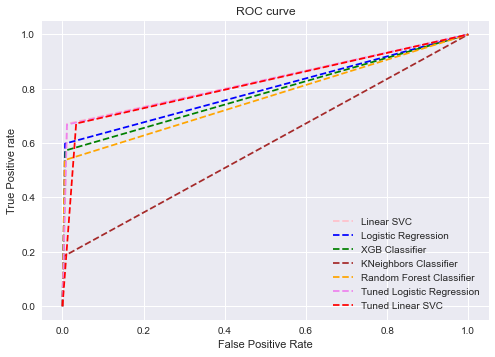

In [71]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(false_positive_rate1, true_positive_rate1, linestyle='--', color='pink', label='Linear SVC')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--', color='blue', label='Logistic Regression')
plt.plot(false_positive_rate3, true_positive_rate3, linestyle='--',color='green', label='XGB Classifier')
plt.plot(false_positive_rate4, true_positive_rate4, linestyle='--',color='brown', label='KNeighbors Classifier')
plt.plot(false_positive_rate5, true_positive_rate5, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(false_positive_rate6, true_positive_rate6, linestyle='--',color='violet', label='Tuned Logistic Regression')
plt.plot(false_positive_rate7, true_positive_rate7, linestyle='--',color='red', label='Tuned Linear SVC')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [72]:
#saving the model
log_reg_text_classifier= pickle.dumps(text_clf_6)

In [75]:
label_to_predict=test_comments_set[0]
test_set_label=text_clf_6.predict(label_to_predict)

In [81]:
#saving the predicted data
df_test_label=pd.DataFrame(list(zip(test_set_label)))
file_name = 'test_labels.csv'
df_test_label.to_csv(file_name)